# Data Prep

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (16, 10)

<IPython.core.display.Javascript object>

--------------------

## Capital Bike Share

In [4]:
def trips_per_hour(file):
    df = pd.read_csv(file)
    df["datetime"] = pd.to_datetime(df["Start date"])
    df.set_index("datetime", inplace=True)
    df["trips"] = 1

    trips = df.trips
    tph = trips.resample("H").sum()
    return tph


def trips_per_day(file):
    trips = pd.read_csv(file)
    trips["date"] = pd.to_datetime(trips["Start date"]).dt.date
    daily_trips = trips.groupby("date")["Duration"].count()
    return daily_trips

<IPython.core.display.Javascript object>

In [5]:
csv_dir = "../data/capitalbikeshare"
csv_files = [
    os.path.join(csv_dir, file) for file in os.listdir(csv_dir) if file[-4:] == ".csv"
]

daily_trip_list = []
hourly_trip_list = []
for bike_share_file in csv_files:
    print(f"Now reading: {bike_share_file}")
    daily_trips = trips_per_day(bike_share_file)
    hourly_trips = trips_per_hour(bike_share_file)

    daily_trip_list.append(daily_trips)
    hourly_trip_list.append(hourly_trips)

daily_trips = pd.concat(daily_trip_list)
daily_trips.asfreq("D", fill_value=np.nan)
daily_trips.name = "daily_trips"
daily_trips.to_csv("../data/trips/daily_trips.csv")

hourly_trips = pd.concat(hourly_trip_list)
hourly_trips.asfreq("H", fill_value=np.nan)
hourly_trips.name = "hourly_trips"
hourly_trips.to_csv("../data/trips/hourly_trips.csv")

Now reading: ../data/capitalbikeshare/2011-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2016Q4-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2013Q1-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2013Q3-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2015Q1-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2015Q4-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2015Q2-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2017Q1-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2012Q3-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2014Q2-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2012Q4-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2017Q3-capitalbikeshare-tripdata.csv
Now reading: ../data/capitalbikeshare/2012Q2-capitalbikeshare-tripdata.csv
Now reading: ../data/capita

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='datetime'>

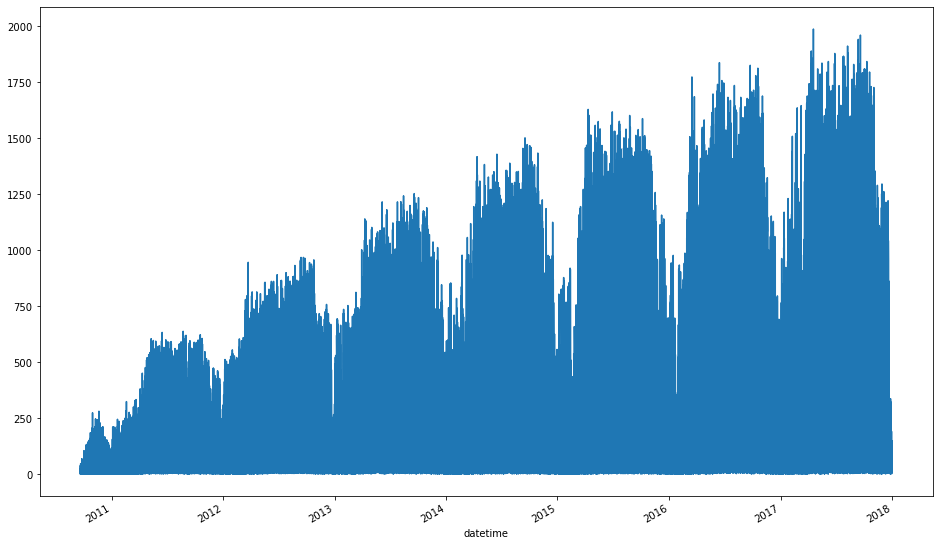

<IPython.core.display.Javascript object>

In [6]:
hourly_trips.plot()

<AxesSubplot:xlabel='date'>

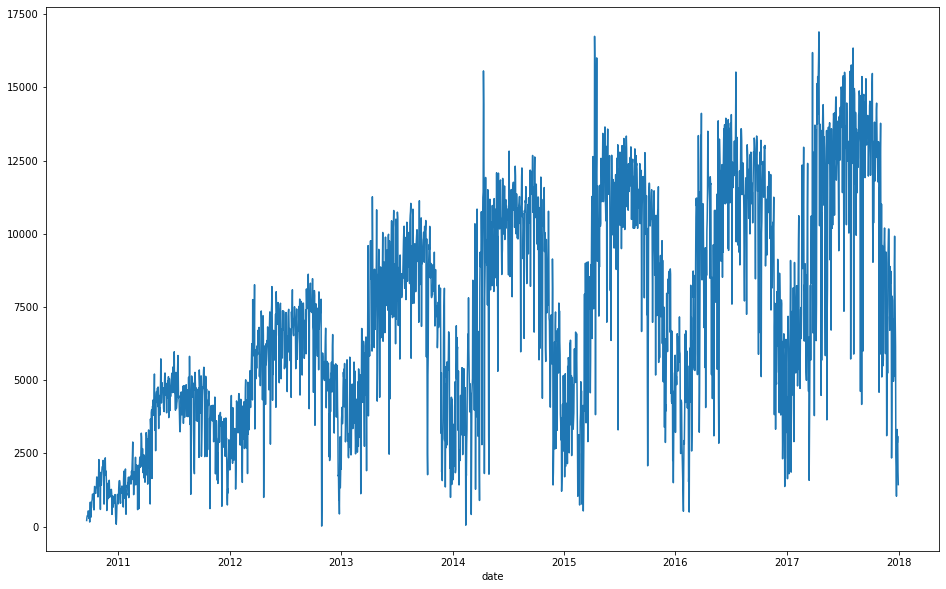

<IPython.core.display.Javascript object>

In [7]:
daily_trips.plot()

## Weather

In [8]:
weather = pd.read_csv("../data/weather/weather_daily_averages.csv")
weather.head()

,Month,Day_Of_Month,Normal_Max_Temp_F,Normal_Max_Temp_C,Normal_Min_Temp_F,Normal_Min_Temp_C,Normal_Precipitation_IN,Normal_Precipitation_CM
0,1,1,46,7.777778,32,0.000000,0.09,0.2286
1,1,2,45,7.222222,31,-0.555556,0.09,0.2286
2,1,3,45,7.222222,31,-0.555556,0.10,0.2540
3,1,4,45,7.222222,31,-0.555556,0.09,0.2286
4,1,5,45,7.222222,31,-0.555556,0.10,0.2540


<IPython.core.display.Javascript object>

In [9]:
daily_index = pd.to_datetime(daily_trips.index)
daily_weather = pd.DataFrame(daily_index)
daily_weather["Month"] = daily_weather.date.dt.month
daily_weather["Day_Of_Month"] = daily_weather.date.dt.day
daily_weather
daily_weather = daily_weather.merge(
    weather[
        [
            "Month",
            "Day_Of_Month",
            "Normal_Max_Temp_C",
            "Normal_Min_Temp_C",
            "Normal_Precipitation_CM",
        ]
    ],
    how="left",
    on=["Month", "Day_Of_Month"],
)
daily_weather.drop(columns=["Month", "Day_Of_Month"], inplace=True)
daily_weather.set_index("date", inplace=True)
daily_weather.asfreq("D")

,Normal_Max_Temp_C,Normal_Min_Temp_C,Normal_Precipitation_CM
date,,,
2010-09-20,26.111111,17.222222,0.3302
2010-09-21,26.111111,16.666667,0.3302
2010-09-22,26.111111,16.666667,0.3048
2010-09-23,25.555556,16.666667,0.3048
2010-09-24,25.555556,16.111111,0.3302
...,...,...,...
2017-12-27,7.777778,0.000000,0.2540
2017-12-28,7.777778,0.000000,0.2540
2017-12-29,7.777778,0.000000,0.2540


<IPython.core.display.Javascript object>

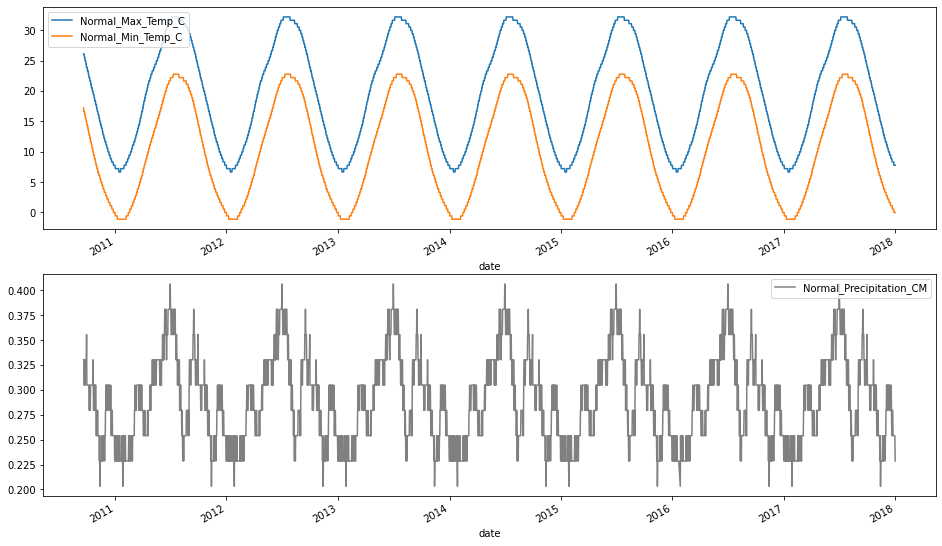

<IPython.core.display.Javascript object>

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1)
daily_weather[["Normal_Max_Temp_C", "Normal_Min_Temp_C"]].plot(ax=ax1)
daily_weather.Normal_Precipitation_CM.plot(ax=ax2, legend="precipitation", color="grey")
plt.show()

## Holidays

In [19]:
us_holidays = holidays.US()
us_holidays.observed = False
# us_holidays.years.set(sorted(daily_index.year.unique().tolist()))

<IPython.core.display.Javascript object>

In [47]:
holiday_df = pd.DataFrame({"ds": daily_index})
holiday_df["holiday"] = holiday_df.ds.apply(lambda x: us_holidays.get(x))
holiday_df.set_index("ds", inplace=True)
holiday_df.asfreq("D")
# Remove minor holidays
holiday_df.holiday = np.where(
    holiday_df.holiday.isin(
        [
            "Columbus Day",
            "Washington's Birthday",
            "Veterans Day",
            "Martin Luther King Jr. Day",
        ]
    ),
    None,
    holiday_df.holiday,
)
holiday_df["lower_window"] = np.where(
    holiday_df.holiday.isin(["Christmas Day", "New Year's Day"]), 1, 0
)
holiday_df["upper_window"] = np.where(holiday_df.holiday.isin(["Thanksgiving"]), 1, 0)
holiday_df = holiday_df[~holiday_df.holiday.isna()].sort_index()
holiday_df.reset_index(inplace=True)
if not os.path.exists("../data/holidays"):
    os.mkdir("../data/holidays")
holiday_df.to_csv("../data/holidays/holidays.csv", index=False)



<IPython.core.display.Javascript object>

In [40]:
holiday_df

,ds,holiday,lower_window,upper_window
0,2010-11-25,Thanksgiving,0,1
1,2010-12-25,Christmas Day,1,0
2,2011-01-01,New Year's Day,1,0
3,2011-05-30,Memorial Day,0,0
4,2011-07-04,Independence Day,0,0
5,2011-09-05,Labor Day,0,0
6,2011-11-24,Thanksgiving,0,1
7,2011-12-25,Christmas Day,1,0
8,2012-01-01,New Year's Day,1,0
9,2012-05-28,Memorial Day,0,0


<IPython.core.display.Javascript object>